In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from pyparsing import python_style_comment
from itertools import islice
from scipy.sparse import diags
from functools import lru_cache

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
# import dataframe_image as dfi


n = 11, t = 1 min 29s

# Energy per Information Bit

## BPPM

In [2]:
comb_cache = {}

@lru_cache(maxsize=None)

def compute_N(n_BPPM):
  def agen(): # generator of terms
      aset, sset, k = set(), set(), 0
      while True:
          k += 1
          while any(k+an in sset for an in aset): k += 1
          yield k; sset.update(k+an for an in aset); aset.add(k)
  a = list(islice(agen(), 100))
  photon = list(map(lambda v: v-1, a))
  compute_N= [sum(photon[:i]) for i in range(1,len(photon)+1)]
  return compute_N[n_BPPM]
    
def EpI_BPPM(n_BPPM):
    N_n = compute_N(n_BPPM)
    factorial_n = math.factorial(n_BPPM)
    codeword = np.log2(float(factorial_n))
    EpI_BPPM = n_BPPM / codeword
    return EpI_BPPM

def codeword_PPM(EpI_BPPM):
    n_PPM = 1
    codeword_PPM = 2**(n_PPM/EpI_BPPM)
    return codeword_PPM

def codeword_TimeBin_General(n_General, EpI_BPPM):
    factorial_n = math.factorial(n_General)
    codeword_General = 2**(n_General/EpI_BPPM)
    Timebin = factorial_n * codeword_General + n_General - 1
    return Timebin

In [3]:
compute_N(5)

26

In [4]:
EpI_BPPM(5)

0.7239147530697906

In [5]:
codeword_PPM(EpI_BPPM(5))

2.605171084697352

In [6]:
codeword_TimeBin_General(2, EpI_BPPM(5))

14.573832761086356

In [7]:
df_EpI_BPPM = pd.DataFrame(columns=['Energy per Information_BPPM',
                                    'Photon Number_BPPM', 
                                    'Time Bin_BPPM',
                                    'Number of Codeword for PPM',
                                    'Number of Codeword for General']
                                 )

for n_BPPM in range(2,51):
    N_n = compute_N(n_BPPM)
    EpI_BPPM_val = EpI_BPPM(n_BPPM)
    codeword_PPM_val = codeword_PPM(EpI_BPPM(n_BPPM))
    codeword_TimeBin_General_val = codeword_TimeBin_General(2, EpI_BPPM(n_BPPM))
    

    
    df_EpI_BPPM.loc[n_BPPM-1] = [EpI_BPPM_val, n_BPPM, N_n, codeword_PPM_val, codeword_TimeBin_General_val]
    

In [8]:
# df_EpI_BPPM = df_EpI_BPPM.set_index('Energy per Information_BPPM')
# df_EpI_BPPM

PPM should be straight line, that does not make sense

BPPM, should have a slope

starting with the General, keep energy per bit constant
4.4 time bin


In [9]:
def combination_G(M, n):
    # if (M_G, n_General) in comb_cache:
    #     return comb_cache[(M_G, n_General)]
    # else:
        comb = math.factorial(M) // (math.factorial(M-n) * math.factorial(n))
        # comb_cache[(M_G, n_General)] = comb
        return comb

In [10]:
M = 4
n_General = 2 

combination_G(M, n_General)

6

## PPM and General

In [11]:
df_EpI = pd.DataFrame(columns=[ 
                                 'Time Bin_PPM and G',
                                 'Energy per Information_G for n = 2',
                                 'Energy per Information_G for n = 3',
                                 'Energy per Information_PPM',
                                 'Wrong Value (n is 2 but M over 3)'
                                 ]
                                 )

for M in range(3,51):
    n_General_2 = 2
    n_General_3 = 3
    n_PPM = 1
    codeword_G_2 = combination_G(M, n_General_2)
    codeword_G_3 = combination_G(M, n_General_3)
    EpI_G_2 = n_General_2 / np.log2(float(codeword_G_2))
    EpI_G_3 = n_General_3 / np.log2(float(codeword_G_3))
    EpI_PPM = n_PPM / np.log2(float(M))
    wrong_val = n_General_3 / np.log2(float(codeword_G_2))
    df_EpI.loc[M-1] = [M, EpI_G_2, EpI_G_3, EpI_PPM, wrong_val]
    

/var/folders/8m/0wg1hssn6n79tjc8mh6p_spr0000gn/T/ipykernel_56536/2765954463.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  EpI_G_3 = n_General_3 / np.log2(float(codeword_G_3))


In [12]:
n_General_3 / np.log2(float(combination_G(3, 3)))

/var/folders/8m/0wg1hssn6n79tjc8mh6p_spr0000gn/T/ipykernel_56536/469510675.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  n_General_3 / np.log2(float(combination_G(3, 3)))


inf

## First comparision: 0.4343

General
 n= 3, M = 10

PPM
n = 1, M = 5

BPPM
n = 11, M = 332

In [13]:
n_General_3 / np.log2(float(combination_G(10, 3)))

0.4343488518418744

In [14]:
1 / np.log2(float(5))

0.43067655807339306

In [15]:
11 / np.log2(float(math.factorial(11)))

0.43563506329006085

## Second Comparison: 0.38

General:
n = 3, M = 12

PPM:
n = 1, M = 6

BPPM:
n = 14, M = 791

In [16]:
n_General_3 / np.log2(float(combination_G(12, 3)))

0.3855367327108329

In [17]:
1 / np.log2(float(6))

0.38685280723454163

In [18]:
14 / np.log2(float(math.factorial(14)))

0.38521596303114397

In [19]:
display(df_EpI)

,Time Bin_PPM and G,Energy per Information_G for n = 2,Energy per Information_G for n = 3,Energy per Information_PPM,Wrong Value (n is 2 but M over 3)
2,3.0,1.261860,inf,0.630930,1.892789
3,4.0,0.773706,1.500000,0.500000,1.160558
4,5.0,0.602060,0.903090,0.430677,0.903090
5,6.0,0.511916,0.694135,0.386853,0.767874
6,7.0,0.455340,0.584877,0.356207,0.683011
7,8.0,0.416029,0.516586,0.333333,0.624044
8,9.0,0.386853,0.469313,0.315465,0.580279
9,10.0,0.364176,0.434349,0.301030,0.546264
10,11.0,0.345939,0.407259,0.289065,0.518909
11,12.0,0.330885,0.385537,0.278943,0.496328


In [20]:
df_concat = pd.concat([df_EpI, df_EpI_BPPM.iloc[:, :3]], axis=1)

In [21]:
df_concat = df_concat.set_index('Time Bin_PPM and G')
df_concat

,Energy per Information_G for n = 2,Energy per Information_G for n = 3,Energy per Information_PPM,Wrong Value (n is 2 but M over 3),Energy per Information_BPPM,Photon Number_BPPM,Time Bin_BPPM
Time Bin_PPM and G,,,,,,,
3.0,1.261860,inf,0.630930,1.892789,1.160558,3.0,7.0
4.0,0.773706,1.500000,0.500000,1.160558,0.872417,4.0,14.0
5.0,0.602060,0.903090,0.430677,0.903090,0.723915,5.0,26.0
6.0,0.511916,0.694135,0.386853,0.767874,0.632121,6.0,46.0
7.0,0.455340,0.584877,0.356207,0.683011,0.569142,7.0,75.0
8.0,0.416029,0.516586,0.333333,0.624044,0.522903,8.0,113.0
9.0,0.386853,0.469313,0.315465,0.580279,0.487300,9.0,165.0
10.0,0.364176,0.434349,0.301030,0.546264,0.458904,10.0,238.0
11.0,0.345939,0.407259,0.289065,0.518909,0.435635,11.0,332.0


In [22]:
# df_concat.to_excel('epi_updated.xlsx', index=False)

## Mutual Information for Constant Energy per Information Bit

First costant energy constant per infroamtion bit:
<br>General protocol for 2 photons: 0.386 with 9 Time Bins 
<br>General protocol for 3 photons: 0.385 with 11 Time Bins
<br>PPM protocol:                   0.386 with 6 Time Bins
<br>BPPM protocol:                  0.385215 with 14 photons and 791 Time Bins

n_General = 2, T_General = 9, n_General = 3, T_General = 11, M = 6, n_BPPM = 14, compute_N(n) = 791

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from pyparsing import python_style_comment
from itertools import islice
import scipy.sparse as sps
from scipy.sparse import diags
from functools import lru_cache

from scipy.special import comb as combination


## BPPM

In [24]:
# from functools import lru_cache

# comb_cache = {}
# comb_n_cache = {}
# comb_n_M_minus_n_cache = {}

# #we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# # define a separate function for computing the sequence of terms used in N

# @lru_cache(maxsize=None)
# def compute_N(n):
#   def agen(): # generator of terms
#       aset, sset, k = set(), set(), 0
#       while True:
#           k += 1
#           while any(k+an in sset for an in aset): k += 1
#           yield k; sset.update(k+an for an in aset); aset.add(k)
#   a = list(islice(agen(), 100))
#   photon = list(map(lambda v: v-1, a))
#   compute_N= [sum(photon[:i]) for i in range(1,len(photon)+1)]
#   return compute_N[n]

# def precompute_combinations(max_n):
#     for n in range(max_n+1):
#         for r in range(n+1):
#             comb = math.factorial(n) // (math.factorial(n-r) * math.factorial(r))
#             comb_cache[(n, r)] = comb

# def combination(n, r):
#     return comb_cache.get((n, r), 0)
    
# # We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# # define a separate function for computing the loss distribution

# def Loss_Distribute(n, P_l, l):
#     comb_n = combination(n, l)
#     return comb_n * (P_l)**l * (1 - P_l)**(n - l)

# def Add_Distribute(n, P_a, a, N_n):
#     M_minus_n = N_n - n
#     comb_Nn_Mn = combination(N_n + M_minus_n, a)
#     return comb_Nn_Mn * (P_a)**a * (1 - P_a)**(M_minus_n - a)

# # define a separate function for computing the probability of error
# def P_err_BPPM(n, P_l, P_a,l,a, N_n):
#   return Loss_Distribute(n,P_l,l) * Add_Distribute(n,P_a, a, N_n)
#   #return combination(n,l) * (P_l)**l*(1-P_l)**(n-l) * combination(N-n,a) * (P_a)**a*(1-P_a)**(N-n-a) 

# # We put these into P_D for re-normalization, These are the probability of error we can correct
# # define separate functions for computing the probability of success
# def P_Success0(n,P_l,P_a,l,a, N_n):
#   return P_err_BPPM(n,P_l, P_a,0,0,N_n)

# def P_Success1(n, P_l, P_a, l, a, N_n):
#     P0 = P_Success0(n, P_l, P_a, l, a, N_n)
#     P1 = P_err_BPPM(n, P_l, P_a, 0, 1, N_n) + P_err_BPPM(n, P_l, P_a, 1, 0, N_n)
#     return P0 + P1

# def P_Success2(n,P_l,P_a,l,a, N_n):
#     P1 = P_Success1(n, P_l, P_a)
#     P2 = P_err_BPPM(n, P_l, P_a, 1, 1, N_n) + P_err_BPPM(n, P_l, P_a, 2, 0, N_n) + P_err_BPPM(n, P_l, P_a, 0, 2, N_n)
#     return P1 + P2

# def P_Success3(n,P_l,P_a,l,a, N_n):
#     P2 = P_err_BPPM(n, P_l, P_a, 1, 1, N_n) + P_err_BPPM(n, P_l, P_a, 2, 0, N_n) + P_err_BPPM(n, P_l, P_a, 0, 2, N_n)
#     P3 = P_err_BPPM(n, P_l, P_a,1,2, N_n) + P_err_BPPM(n, P_l, P_a, 2,1, N_n) + P_err_BPPM(n, P_l, P_a,3,0, N_n) + P_err_BPPM(n, P_l, P_a,0,3, N_n)
#     return P2 + P3

# def P_D(n,P_l,P_a,l,a, N_n):
# # we only consider at most 1 error, i.e. P_0 + P_1
#   return 1 - P_Success1(n,P_l,P_a,l,a, N_n)

# # sum over the elements in rows in the probability matrix P_AB
# # renormalized in P_AB already
# def P_A_BPPM(P_AB_BPPM, P_D):
#     if P_D == 1:
#         return [1 for row in P_AB_BPPM]
#     else:
#         return [1/(1-P_D) * sum(row) for row in P_AB_BPPM] 
# # sum over the elements in columns in the probability matrix P_AB
# # renormalized in P_AB already

# def P_B_BPPM(P_AB_BPPM, P_D):
#     if P_D == 1:
#         return [1 for col in zip(*P_AB_BPPM)]
#     else:
#         return [1/(1-P_D) * sum(col) for col in zip(*P_AB_BPPM)]
# # # calculate the trace of the probability matrix P_AB

# def I_AB_BPPM(H_A_BPPM, H_B_BPPM, H_AB_BPPM, P_D):
#     if np.isnan(H_AB_BPPM):
#         return 0
#     else:
#         return ((H_A_BPPM + H_B_BPPM - H_AB_BPPM))*(1-P_D)
        


In [25]:
# def P_AB_BPPM(n, P_D):
#     factorial_n = round(math.gamma(n + 1))
#     diag_data = (1/factorial_n) * (1-P_D) * np.ones(factorial_n)
#     matrix = sps.dia_matrix((diag_data, 0), shape=(factorial_n, factorial_n))
#     return matrix

# def entropy(P):
#     P_non_zero = np.where(P == 0, 1, P)
#     H = -np.sum(P * np.log2(P_non_zero))
#     return H

# def H_A_BPPM(P_AB_BPPM):
#     P_A_BPPM = P_AB_BPPM.diagonal()
#     return np.sum(-P_A_BPPM * np.log2(np.where(P_A_BPPM == 0, 1, P_A_BPPM)))

# def H_B_BPPM(P_AB_BPPM):
#     P_B_BPPM = P_AB_BPPM.diagonal()
#     return np.sum(-P_B_BPPM * np.log2(np.where(P_B_BPPM == 0, 1, P_B_BPPM)))

# def H_AB_BPPM(P_AB_BPPM):
#     P_AB_BPPM = P_AB_BPPM.diagonal()
#     P_AB_BPPM = np.where(P_AB_BPPM == 0, 1e-9, P_AB_BPPM)  # replace zero values with 1e-9
#     return -(P_AB_BPPM * np.log2(P_AB_BPPM)).sum()


# # Precompute the combinations
# precompute_combinations(max_n=10)  # Adjust max_n as needed

In [26]:
from functools import lru_cache

comb_cache = {}
#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
# def combination(n, r):
#     # if r > n:
#     #     return 0
#     # else:
#     return math.factorial((int(n))) / (math.factorial((int(n-r))) * math.factorial((int(r))))


def combination(n, r):
    if (n, r) in comb_cache:
        return comb_cache[(n, r)]
    else:
        comb = math.factorial(n) // (math.factorial(n-r) * math.factorial(r))
        comb_cache[(n, r)] = comb
        return comb
    
@lru_cache(maxsize=None)
def compute_N(n):
  def agen(): # generator of terms
      aset, sset, k = set(), set(), 0
      while True:
          k += 1
          while any(k+an in sset for an in aset): k += 1
          yield k; sset.update(k+an for an in aset); aset.add(k)
  a = list(islice(agen(), 100))
  photon = list(map(lambda v: v-1, a))
  compute_N= [sum(photon[:i]) for i in range(1,len(photon)+1)]
  return compute_N[n]

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution
comb_n_cache = {}

# def Loss_Distribute(n, P_l, l):
    # # if P_l == 0:
    # #     return 1
    # # else:
    #   return combination(n, l) * (P_l)**l * (1 - P_l)**(n - l)

def Loss_Distribute(n, P_l, l):
    if (n, l) in comb_n_cache:
        comb_n = comb_n_cache[(n, l)]
    else:
        comb_n = combination(n, l)
        comb_n_cache[(n, l)] = comb_n

    return comb_n * (P_l)**l * (1 - P_l)**(n - l)

# def Add_Distribute(n, P_a, a):
#     N_n = compute_N(n)
#     # if P_a == 0:
#     #     return 1
#     # else:
#     return combination(N_n - n, a) * (P_a)**a * (1 - P_a)**(N_n - n - a)

comb_n_M_minus_n_cache = {}
def Add_Distribute(n, P_a, a):
    N_n = compute_N(n)
    M_minus_n = compute_N(n) - N_n
    if (N_n, M_minus_n, a) in comb_n_M_minus_n_cache:
        comb_Nn_Mn = comb_n_M_minus_n_cache[(N_n, M_minus_n, a)]
    else:
        comb_Nn_Mn = combination(N_n + M_minus_n, a)
        comb_n_M_minus_n_cache[(N_n, M_minus_n, a)] = comb_Nn_Mn

    return comb_Nn_Mn * (P_a)**a * (1 - P_a)**(M_minus_n - a)

# define a separate function for computing the probability of error
def P_err(n, P_l, P_a,l,a):
  return Loss_Distribute(n,P_l,l) * Add_Distribute(n,P_a, a)
  #return combination(n,l) * (P_l)**l*(1-P_l)**(n-l) * combination(N-n,a) * (P_a)**a*(1-P_a)**(N-n-a) 

# We put these into P_D for re-normalization, These are the probability of error we can correct
# define separate functions for computing the probability of success
def P_Success0(n,P_l,P_a,l,a):
  return P_err(n,P_l, P_a,0,0)

def P_Success1(n,P_l,P_a,l,a):
  P0 = P_Success0(n, P_l, P_a,l,a)
  P1 = P_err(n, P_l, P_a, l=0, a=1) + P_err(n, P_l, P_a, l=1, a=0)
  return P0 + P1

def P_Success2(n,P_l,P_a,l,a):
  P1 = P_Success1(n, P_l, P_a)
  P2 = P_err(n, P_l, P_a, l=1, a=1) + P_err(n, P_l, P_a, l=2, a=0) + P_err(n, P_l, P_a, l=0, a=2)
  return P1 + P2

def P_Success3(n,P_l,P_a,l,a):
  P2 = P_err(n, P_l, P_a, l=1, a=1) + P_err(n, P_l, P_a, l=2, a=0) + P_err(n, P_l, P_a, l=0, a=2)
  P3 = P_err(n, P_l, P_a,1,2) + P_err(n, P_l, P_a, 2,1) + P_err(n, P_l, P_a,3,0) + P_err(n, P_l, P_a,0,3)
  return P2 + P3

def P_D(n,P_l,P_a,l,a):
# we only consider at most 1 error, i.e. P_0 + P_1
  return 1 - P_Success1(n,P_l,P_a,l,a)

# sum over the elements in rows in the probability matrix P_AB
# renormalized in P_AB already
def P_A_BPPM(P_AB_BPPM, P_D):
    if P_D == 1:
        return [1 for row in P_AB_BPPM]
    else:
        return [1/(1-P_D) * sum(row) for row in P_AB_BPPM] 
# sum over the elements in columns in the probability matrix P_AB
# renormalized in P_AB already
def P_B_BPPM(P_AB_BPPM, P_D):
    if P_D == 1:
        return [1 for col in zip(*P_AB_BPPM)]
    else:
        return [1/(1-P_D) * sum(col) for col in zip(*P_AB_BPPM)]
# # calculate the trace of the probability matrix P_AB
# def trace_P_AB(P_AB):
#     return sum([P_AB[i][i] for i in range(len(P_AB))])

# H_A, H_B, H_AB are the same as the trivial case

# def I_AB(H_A, H_B, H_AB, P_D):
#   return ((H_A + H_B - H_AB))*(1-P_D)

def I_AB_BPPM(H_A_BPPM, H_B_BPPM, H_AB_BPPM, P_D):
    if np.isnan(H_AB_BPPM):
        return 0
    else:
        return ((H_A_BPPM + H_B_BPPM - H_AB_BPPM))*(1-P_D)


In [27]:
def P_AB_BPPM(n, P_D):
    factorial_n = math.factorial(n)
    diag_data = (1/factorial_n) * (1-P_D) * np.ones(factorial_n)
    matrix = sps.dia_matrix((diag_data, 0), shape=(factorial_n, factorial_n))
    return matrix

def H_A_BPPM(P_AB_BPPM):
    P_A_BPPM = P_AB_BPPM.diagonal()
    H_a = np.sum(-P_A_BPPM * np.log2(np.where(P_A_BPPM == 0, 1, P_A_BPPM)))
    return H_a

def H_B_BPPM(P_AB_BPPM):
    P_B_BPPM = P_AB_BPPM.diagonal()
    H_b = np.sum(-P_B_BPPM * np.log2(np.where(P_B_BPPM == 0, 1, P_B_BPPM)))
    return H_b

def H_AB_BPPM(P_AB_BPPM):
    P_AB_BPPM = P_AB_BPPM.diagonal()
    P_AB_BPPM = np.where(P_AB_BPPM == 0, 1e-9, P_AB_BPPM)  # replace zero values with 1e-9
    H = -(P_AB_BPPM * np.log2(P_AB_BPPM)).sum()
    return H

## PPM

In [28]:
def compute_M(n_BPPM):
  return n_BPPM

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_PPM(M, n_PPM):
    return math.factorial((int(M))) / (math.factorial((int(M - n_PPM))) * math.factorial((int(n_PPM))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_PPM(n_PPM, P_l, l):
    # if P_l == 0:
    #     return 1
    # else:
      return combination(n_PPM, l) * (P_l)**l * (1 - P_l)**(n_PPM - l)

def Add_Distribute_PPM(n_PPM, P_a, a):
    M = compute_M(n_BPPM)
    # if P_a == 0:
    #     return 1
    # else:
    return combination(M - n_PPM, a) * (P_a)**a * (1 - P_a)**(M - n_PPM - a)

# define a separate function for computing the probability of error
def P_err_PPM(n_PPM, P_l, P_a,l,a):
  return Loss_Distribute(n_PPM,P_l,l) * Add_Distribute(n_PPM,P_a, a)
  #return combination(n,l) * (P_l)**l*(1-P_l)**(n-l) * combination(N-n,a) * (P_a)**a*(1-P_a)**(N-n-a) 


def P_Success_PPM(n_PPM,P_l,P_a,l,a):
  return P_err_PPM(n_PPM,P_l, P_a, l=0, a=0) 

# Perr[l = 0, a = 0, n = 1, N = M, Ploss, Padd] from mathematica


def P_D_PPM(n_PPM,P_l,P_a, l=0,a=0):
  return 1 - P_Success_PPM(n_PPM,P_l,P_a, l=0, a=0)

# sum over the elements in rows in the probability matrix P_AB
def P_A_PPM(P_AB_PPM, P_D_PPM):
    if P_D_PPM == 1:
        return [1 for row in P_AB_PPM]
    else:
        return [sum(row) for row in P_AB_PPM] # 1/(1-P_D_PPM)*

# sum over the elements in columns in the probability matrix P_AB
def P_B_PPM(P_AB_PPM):
    if P_D == 1:
        return [1 for col in zip(*P_AB_PPM)]
    else:
        return [sum(col) for col in zip(*P_AB_PPM)]


def I_AB_PPM(H_A_PPM, H_B_PPM, H_AB_PPM, P_D_PPM):
    if np.isnan(H_AB_PPM):
        return 0
    else:
        return ((H_A_PPM + H_B_PPM - H_AB_PPM)) * (1-P_D_PPM)

In [29]:
def P_AB_PPM(M):
    matrix =  np.eye(2*M) * 1/(2*M)  #[[1/M * P_AB_PPM[i] if i == j else 0 for j in range(M)] for i in range(M)]
    return matrix 

def H_A_PPM(P_AB_PPM):
     P_A_PPM = np.sum(P_AB_PPM, axis=1)
     H_a_PPM = np.sum(-P_A_PPM * np.log2(np.where(P_A_PPM == 0, 1, P_A_PPM)))
     return H_a_PPM

def H_B_PPM(P_AB_PPM):
     P_B_PPM = np.sum(P_AB_PPM, axis=0)
     H_b_PPM = np.sum(-P_B_PPM * np.log2(np.where(P_B_PPM == 0, 1, P_B_PPM)))
     return H_b_PPM

def H_AB_PPM(P_AB_PPM):
    P_AB_PPM = np.where(P_AB_PPM == 0, 1e-9, P_AB_PPM)  # replace zero values with 1e-9
    H_PPM = -(P_AB_PPM * np.log2(P_AB_PPM)).sum()
    return H_PPM

## General

In [30]:
def Compute_G_n(n_General):
    return n_General

def compute_T_General(n_General, M):
  T_General = compute_M(n_BPPM) * n_General
  return T_General

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_General(T_General, n_General):
    # if r > n:
    #     return 0
    # else:
    # return math.factorial((int(T_General))) / (math.factorial((int(T_General-n_General))) * math.factorial((int(n_General))))
    return math.factorial(((T_General))) / (math.factorial(((T_General-n_General))) * math.factorial(((n_General))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_General(n_General, P_l, l):
    # if P_l == 0:
    #     return 1
    # else:
      return combination(n_General, l) * (P_l)**l * (1 - P_l)**(n_General - l)

def Add_Distribute_General(n_General, P_a, a):
    
    T_General = compute_T_General(n_General)
    # if P_a == 0:
    #     return 1
    # else:
    return combination(T_General - n_General, a) * (P_a)**a * (1 - P_a)**(T_General - n_General - a)

# define a separate function for computing the probability of error
def P_err_General(n_General, P_l, P_a,l,a):
  return Loss_Distribute(n_General,P_l,l) * Add_Distribute(n_General,P_a, a)

def P_Success_General(n_General,P_l,P_a,l,a):
  return P_err_General(n_General,P_l, P_a, l=0, a=0) 

# Perr[l = 0, a = 0, n = 1, N = M, Ploss, Padd] from mathematica

def P_D_General(n_General,P_l,P_a, l=0,a=0):
  return 1 - P_Success_General(n_General,P_l,P_a, l=0, a=0)

def P_A_General(P_AB_General, P_D_General):
    if P_D == 1:
        return [1 for row in P_AB_General]
    else:
        return [sum(row) for row in P_AB_General] # 1/(1-P_D_OOK)*

# sum over the elements in columns in the probability matrix P_AB
def P_B_General(P_AB_General, P_D_General):
    if P_D == 1:
        return [1 for col in zip(*P_AB_General)]
    else:
        return [sum(col) for col in zip(*P_AB_General)]

def I_AB_General(H_A_General, H_B_General, H_AB_General, P_D_General):
    if np.isnan(H_AB_General):
        return 0
    else:
        return ((H_A_General + H_B_General - H_AB_General)) * (1-P_D_General)

In [31]:
def P_AB_diag_General(M, n_General):
    T_General = compute_T_General(n_General, M)
    diag_data = np.ones(int(combination(T_General, n_General))) / combination(T_General, n_General)
    matrix = sps.dia_matrix((diag_data, 0), shape=(diag_data.size, diag_data.size))
    return matrix
    
def H_A_General(P_A_General):
    P_A_General_diag = P_A_General.diagonal()
    H_a_General = np.sum(-P_A_General_diag * np.log2(np.where(P_A_General_diag == 0, 1, P_A_General_diag)))
    return H_a_General

def H_B_General(P_B_General):
    P_B_General_diag = P_B_General.diagonal()
    H_b_General = np.sum(-P_B_General_diag * np.log2(np.where(P_B_General_diag == 0, 1, P_B_General_diag)))
    return H_b_General

def H_AB_General(P_AB_General):
    P_AB_General_diag = P_AB_General.diagonal()
    P_AB_General_diag = np.where(P_AB_General_diag == 0, 1e-9, P_AB_General_diag)  # replace zero values with 1e-9
    H_General = -(P_AB_General_diag * np.log2(P_AB_General_diag)).sum()
    return H_General

## n = 11

In [32]:
import numpy as np
import matplotlib.pyplot as plt

I_AB_BPPM_list_11 = []
Normalized_I_AB_BPPM_list_11 = []

P_list = np.linspace(1e-6, 0.1, 101)

for P in P_list:
    n = 11
    N_n = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)

    P_AB_BPPM_val = P_AB_BPPM(n, P_D_val)

    H_A_BPPM_val = H_A_BPPM(P_AB_BPPM_val)
    H_B_BPPM_val = H_B_BPPM(P_AB_BPPM_val)
    H_AB_BPPM_val = H_AB_BPPM(P_AB_BPPM_val)
    I_AB_BPPM_val = I_AB_BPPM(H_A_BPPM_val, H_B_BPPM_val, H_AB_BPPM_val, P_D_val)
    I_AB_BPPM_list_11.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM(H_A_BPPM_val, H_B_BPPM_val, H_AB_BPPM_val, P_D_val) / I_AB_BPPM(H_A_BPPM_val, H_B_BPPM_val, H_AB_BPPM_val, 0)
    Normalized_I_AB_BPPM_list_11.append(Normalized_I_AB_BPPM_val)
# # Plot the results
# plt.plot(P_list, I_AB_BPPM_list_11, label='n=11', linewidth=3)
# plt.xlabel('P')
# plt.ylabel('I_AB_BPPM')
# plt.legend()
# plt.grid()
# plt.show()

# PPM

In [33]:
def compute_M(n_BPPM):
    return n_BPPM

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_PPM(M, n_PPM):
    return math.factorial((int(M))) / (math.factorial((int(M - n_PPM))) * math.factorial((int(n_PPM))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_PPM(n_PPM, P_l, l):
      return combination(n_PPM, l) * (P_l)**l * (1 - P_l)**(n_PPM - l)

def Add_Distribute_PPM(n_PPM, P_a, a):
    M = compute_M(n_BPPM)
    return combination(M - n_PPM, a) * (P_a)**a * (1 - P_a)**(M - n_PPM - a)


# define a separate function for computing the probability of error
def P_err_PPM(n_PPM, P_l, P_a,l,a):
  return Loss_Distribute_PPM(n_PPM,P_l,l) * Add_Distribute_PPM(n_PPM,P_a, a)
  #return combination(n,l) * (P_l)**l*(1-P_l)**(n-l) * combination(N-n,a) * (P_a)**a*(1-P_a)**(N-n-a) 

def P_Success_PPM(n_PPM,P_l,P_a,l,a):
  return P_err_PPM(n_PPM,P_l, P_a, l=0, a=0) 

# Perr[l = 0, a = 0, n = 1, N = M, Ploss, Padd] from mathematica

def P_D_PPM(n_PPM,P_l,P_a, l=0,a=0):
  return 1 - P_Success_PPM(n_PPM,P_l,P_a, l=0, a=0)

def I_AB_PPM(H_A_PPM, H_B_PPM, H_AB_PPM, P_D_PPM):
    if np.isnan(H_AB_PPM):
        return 0
    else:
        return ((H_A_PPM + H_B_PPM - H_AB_PPM)) * (1-P_D_PPM)


In [34]:
def P_AB_PPM(M):
    matrix =  np.eye(2*M) * 1/(2*M)  #[[1/M * P_AB_PPM[i] if i == j else 0 for j in range(M)] for i in range(M)]
    return matrix 

# sum over the elements in rows in the probability matrix P_AB
def P_A_PPM(P_AB_PPM, P_D_PPM):
    if P_D_PPM == 1:
        return [1 for row in P_AB_PPM]
    else:
        return [sum(row) for row in P_AB_PPM] # 1/(1-P_D_PPM)*

# sum over the elements in columns in the probability matrix P_AB
def P_B_PPM(P_AB_PPM):
    if P_D == 1:
        return [1 for col in zip(*P_AB_PPM)]
    else:
        return [sum(col) for col in zip(*P_AB_PPM)]
def H_A_PPM(P_AB_PPM):
     P_A_PPM = np.sum(P_AB_PPM, axis=1)
     H_a_PPM = np.sum(-P_A_PPM * np.log2(np.where(P_A_PPM == 0, 1, P_A_PPM)))
     return H_a_PPM

def H_B_PPM(P_AB_PPM):
     P_B_PPM = np.sum(P_AB_PPM, axis=0)
     H_b_PPM = np.sum(-P_B_PPM * np.log2(np.where(P_B_PPM == 0, 1, P_B_PPM)))
     return H_b_PPM

def H_AB_PPM(P_AB_PPM):
    P_AB_PPM = np.where(P_AB_PPM == 0, 1e-9, P_AB_PPM)  # replace zero values with 1e-9
    H_PPM = -(P_AB_PPM * np.log2(P_AB_PPM)).sum()
    return H_PPM

In [35]:
I_AB_PPM_list_11 = []
Normalized_I_AB_PPM_list_11 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_PPM = 1
  M = 10
  P_D_PPM_val = P_D_PPM(n_PPM,P, 0, l=0,a=0)   
  
  P_AB_PPM_val = P_AB_PPM(M) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)

  H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM(P_AB_PPM_val)

  I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)
  I_AB_PPM_list_11.append(I_AB_PPM_val)
  Normalized_I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val) / I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, 0)
  Normalized_I_AB_PPM_list_11.append(Normalized_I_AB_PPM_val)

In [36]:
compute_M(6)

6

# General
n = 2, M_G = 12
 n = 3, M_G = 18

In [37]:
def Compute_G_n(n_General):
    return n_General

def compute_T_General(n_General, n_BPPM):
  T_General = compute_M(n_BPPM) * n_General
  return T_General

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_General(T_General, n_General):
    return math.factorial(((T_General))) / (math.factorial(((T_General-n_General))) * math.factorial(((n_General))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_General(n_General, P_l, l):
      return combination(n_General, l) * (P_l)**l * (1 - P_l)**(n_General - l)

def Add_Distribute_General(n_General, P_a, a):
    T_General = compute_M(n_BPPM) * n_General
    return combination(T_General - n_General, a) * (P_a)**a * (1 - P_a)**(T_General - n_General - a)

# define a separate function for computing the probability of error
def P_err_General(n_General, P_l, P_a,l,a):
  return Loss_Distribute_General(n_General,P_l,l) * Add_Distribute_General(n_General,P_a, a)

def P_Success_General(n_General,P_l,P_a,l,a):
  return P_err_General(n_General,P_l, P_a, l=0, a=0) 


def P_D_General(n_General,P_l,P_a, l=0,a=0):
  return 1 - P_Success_General(n_General,P_l,P_a, l=0, a=0)

def P_A_General(P_AB_General, P_D_General):
    if P_D_General == 1:
        return [1 for row in P_AB_General]
    else:
        return [sum(row) for row in P_AB_General]

# sum over the elements in columns in the probability matrix P_AB
def P_B_General(P_AB_General, P_D_General):
    if P_D_General == 1:
        return [1 for col in zip(*P_AB_General)]
    else:
        return [sum(col) for col in zip(*P_AB_General)]

def I_AB_General(H_A_General, H_B_General, H_AB_General, P_D_General):
    if np.isnan(H_AB_General):
        return 0
    else:
        return ((H_A_General + H_B_General - H_AB_General)) * (1-P_D_General)

In [38]:
def P_AB_diag_General(n_BPPM, n_General):
    T_General = compute_T_General(n_General, n_BPPM)
    diag_data = np.ones(int(combination(T_General, n_General))) / combination(T_General, n_General)
    matrix = sps.dia_matrix((diag_data, 0), shape=(diag_data.size, diag_data.size))
    return matrix
    
def H_A_General(P_A_General):
    P_A_General_diag = P_A_General.diagonal()
    H_a_General = np.sum(-P_A_General_diag * np.log2(np.where(P_A_General_diag == 0, 1, P_A_General_diag)))
    return H_a_General

def H_B_General(P_B_General):
    P_B_General_diag = P_B_General.diagonal()
    H_b_General = np.sum(-P_B_General_diag * np.log2(np.where(P_B_General_diag == 0, 1, P_B_General_diag)))
    return H_b_General

def H_AB_General(P_AB_General):
    P_AB_General_diag = P_AB_General.diagonal()
    P_AB_General_diag = np.where(P_AB_General_diag == 0, 1e-9, P_AB_General_diag)  # replace zero values with 1e-9
    H_General = -(P_AB_General_diag * np.log2(P_AB_General_diag)).sum()
    return H_General

In [39]:
# I_AB_General_n2_list_6 = []

# P_list = np.linspace(1e-6,0.1,101)

# for P in P_list:
#   n_BPPM = 11
#   n_General = Compute_G_n(2)
#   T_General = compute_T_General(n_General, n_BPPM)

#   P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

#   P_AB_General_diag_val = P_AB_diag_General(n_BPPM, n_General)

#   H_A_General_val = H_A_General(P_AB_General_diag_val)
#   H_B_General_val = H_B_General(P_AB_General_diag_val)
#   H_AB_General_val = H_AB_General(P_AB_General_diag_val)

#   I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
#   I_AB_General_n2_list_6.append(I_AB_General_val)



In [40]:
# Compute_G_n(2), compute_T_General(2, 6), compute_M(6)

In [41]:
# I_AB_General(H_A_General(P_AB_diag_General(6, 2)), H_B_General(P_AB_diag_General(6, 2)), H_AB_General(P_AB_diag_General(6, 2)), P_D_General(2, 0, 0, l=0, a=0))

In [42]:
I_AB_General_n3_list_11 = []

Normalized_I_AB_General_n3_list_11 = []

P_list = np.linspace(1e-6,0.1,101)


for P in P_list:
  # n_BPPM = 11
  n_General = Compute_G_n(3)
  T_General = 10 #compute_T_General(n_General, n_BPPM)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(n_BPPM, n_General)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n3_list_11.append(I_AB_General_val)
  
  Normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0)
  Normalized_I_AB_General_n3_list_11.append(Normalized_I_AB_General_val)



In [43]:
# Compute_G_n(3), compute_T_General(3, 6), compute_M(6)

In [44]:
# I_AB_General(H_A_General(P_AB_diag_General(6, 3)), H_B_General(P_AB_diag_General(6, 3)), H_AB_General(P_AB_diag_General(6, 3)), P_D_General(3, 0, 0, l=0, a=0))

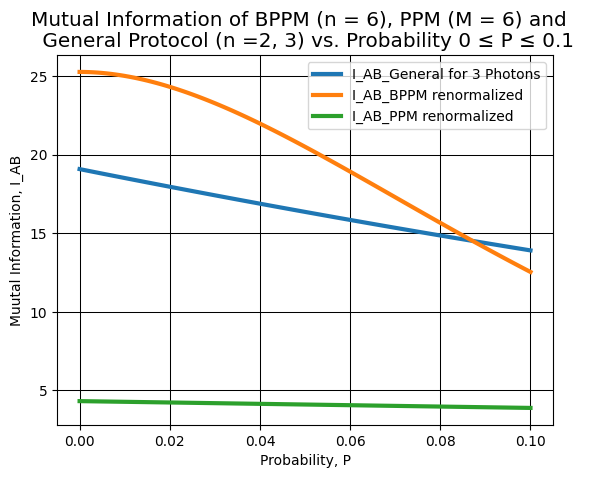

In [45]:

# plt.plot(P_list, I_AB_General_n2_list_6, linewidth=3, label='I_AB_General for 2 Photons')
plt.plot(P_list, I_AB_General_n3_list_11, linewidth=3, label='I_AB_General for 3 Photons')
plt.plot(P_list, I_AB_BPPM_list_11, label='I_AB_BPPM renormalized', linewidth=3, alpha=1)
plt.plot(P_list, I_AB_PPM_list_11, label='I_AB_PPM renormalized', linewidth=3, alpha=1)

# Add axis labels and a title
plt.xlabel('Probability, P')
plt.ylabel('Muutal Information, I_AB')
plt.title('Mutual Information of BPPM (n = 6), PPM (M = 6) and  \n General Protocol (n =2, 3) vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')

plt.grid(color='k', linestyle='-', linewidth=0.75)

# Add a legend
plt.legend()

# Show the plot
plt.show()

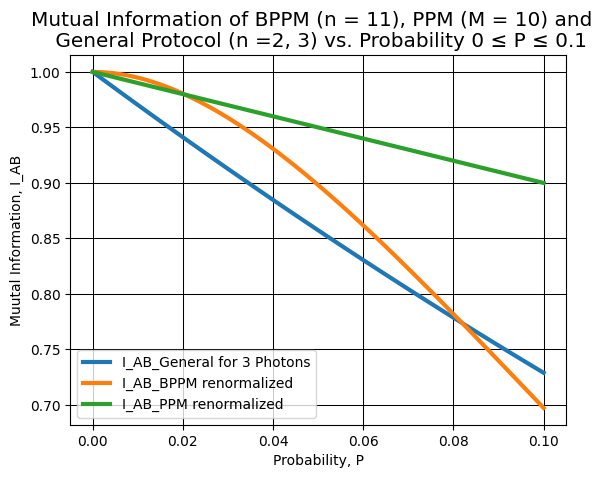

In [46]:
# plt.plot(P_list, I_AB_General_n2_list_6, linewidth=3, label='I_AB_General for 2 Photons')
plt.plot(P_list, Normalized_I_AB_General_n3_list_11, linewidth=3, label='I_AB_General for 3 Photons')
plt.plot(P_list, Normalized_I_AB_BPPM_list_11, label='I_AB_BPPM renormalized', linewidth=3, alpha=1)
plt.plot(P_list, Normalized_I_AB_PPM_list_11, label='I_AB_PPM renormalized', linewidth=3, alpha=1)

# Add axis labels and a title
plt.xlabel('Probability, P')
plt.ylabel('Muutal Information, I_AB')
plt.title('Mutual Information of BPPM (n = 11), PPM (M = 10) and  \n General Protocol (n =2, 3) vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')

plt.grid(color='k', linestyle='-', linewidth=0.75)

# Add a legend
plt.legend()

# Show the plot
plt.show()

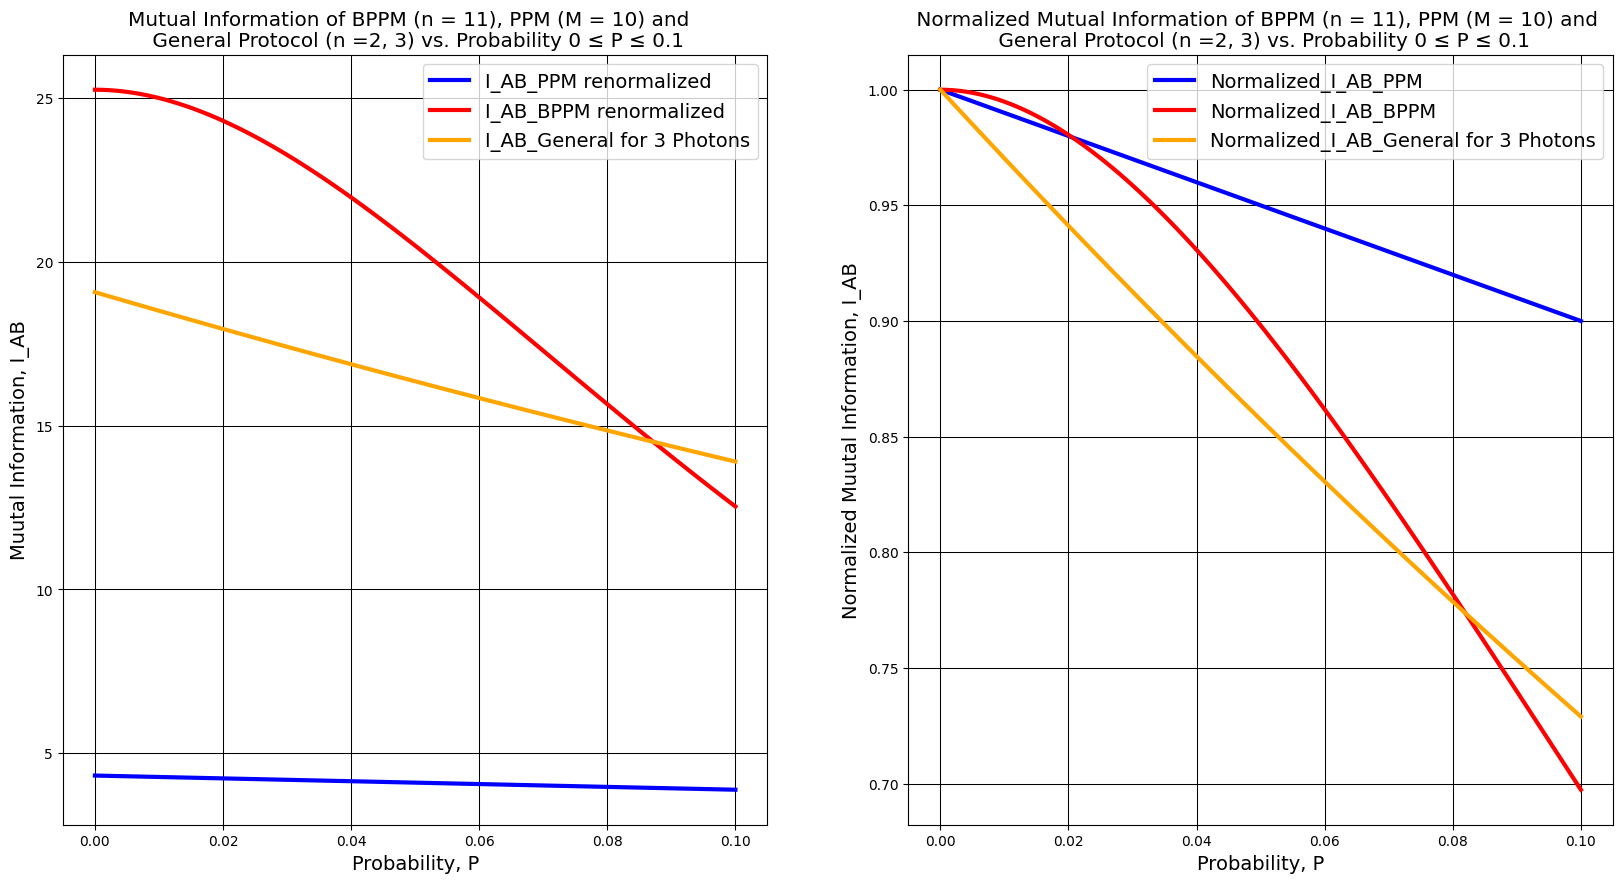

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))

ax1.plot(P_list, I_AB_PPM_list_11, label='I_AB_PPM renormalized',color ='blue', linewidth=3, alpha=1)
ax1.plot(P_list, I_AB_BPPM_list_11, label='I_AB_BPPM renormalized', color ='red',linewidth=3, alpha=1)
ax1.plot(P_list, I_AB_General_n3_list_11,label='I_AB_General for 3 Photons', color ='orange', linewidth=3, alpha=1)
ax1.set_xlabel('Probability, P', fontsize = 14)
ax1.set_ylabel('Muutal Information, I_AB', fontsize = 14)
ax1.set_title('Mutual Information of BPPM (n = 11), PPM (M = 10) and  \n General Protocol (n =2, 3) vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')
ax1.grid(color='k', linestyle='-', linewidth=0.75)
ax1.legend(fontsize=14)

ax2.plot(P_list, Normalized_I_AB_PPM_list_11, label='Normalized_I_AB_PPM',color ='blue', linewidth=3, alpha=1)
ax2.plot(P_list, Normalized_I_AB_BPPM_list_11, label='Normalized_I_AB_BPPM',color ='red', linewidth=3, alpha=1)
ax2.plot(P_list, Normalized_I_AB_General_n3_list_11,label='Normalized_I_AB_General for 3 Photons', color ='orange', linewidth=3, alpha=1)
ax2.set_xlabel('Probability, P', fontsize = 14)
ax2.set_ylabel('Normalized Muutal Information, I_AB', fontsize = 14)
ax2.set_title(' Normalized Mutual Information of BPPM (n = 11), PPM (M = 10) and  \n General Protocol (n =2, 3) vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')
ax2.grid(color='k', linestyle='-', linewidth=0.75)
ax2.legend(fontsize=14)

fig.set_facecolor("white")
# plt.savefig('protocol/MI_Energy_3schemes_Plot.png', dpi=450, bbox_inches='tight')

plt.show()


## Transmission Rate

In [49]:
import numpy as np
import math
#rate  = bit / time bin

df_transmission_rate_BPPM = pd.DataFrame(columns=[
                                    'Photon Number_BPPM', 
                                 'Time Bin_BPPM',
                                 'Transmission Rate_BPPM',
                                #  'Transmission Rate_PPM',
                                #  'Transmission Rate_G for n =2', 
                                #  'Transmission Rate_G for n =3'
                                ]
                                 )

for n_BPPM in range(3,51):
    n_PPM = 1
    n_General = 2
    N_n = compute_N(n_BPPM)
    
    K_BPPM = math.factorial(n)
    rate_BPPM = np.log2(K_BPPM) / N_n
    # rate_PPM = np.log2(M) / M

    # rate_G_2 = 2 / n_BPPM 
    # rate_G_3 = 3 / n_BPPM
    df_transmission_rate_BPPM.loc[n_BPPM-1] = [n_BPPM, N_n, rate_BPPM]

In [50]:
df_transmission_rate_BPPM

,Photon Number_BPPM,Time Bin_BPPM,Transmission Rate_BPPM
2,3.0,7.0,3.607213
3,4.0,14.0,1.803607
4,5.0,26.0,0.971173
5,6.0,46.0,0.548924
6,7.0,75.0,0.336673
7,8.0,113.0,0.223456
8,9.0,165.0,0.153033
9,10.0,238.0,0.106095
10,11.0,332.0,0.076056
11,12.0,459.0,0.055012


In [51]:
import numpy as np

#rate  = bit / time bin

df_transmission_rate = pd.DataFrame(columns=[
                                    
                                 'Time Bin',
                                
                                 'Transmission Rate_PPM',
                                 'Transmission Rate_G for n =2', 
                                 'Transmission Rate_G for n =3'
                                ]
                                 )

for M in range(3,51):
    n_PPM = 1
    n_General_2 = 2
    n_General_3 = 3
    rate_PPM = np.log2(M) / M
    K_General_2 = math.factorial(M) / (math.factorial(M-2) * math.factorial(2)) 
    K_General_3 = math.factorial(M) / (math.factorial(M-3) * math.factorial(3)) 
    rate_G_2 =  K_General_2 / M 
    rate_G_3 =  K_General_3 / M
    df_transmission_rate.loc[M-1] = [M, rate_PPM, rate_G_2,rate_G_3]

In [52]:
# df_transmission_rate

In [53]:
df_concat_transmission = pd.concat([df_transmission_rate_BPPM, df_transmission_rate.iloc[:, :3]], axis=1)
df_concat_transmission

,Photon Number_BPPM,Time Bin_BPPM,Transmission Rate_BPPM,Time Bin,Transmission Rate_PPM,Transmission Rate_G for n =2
2,3.0,7.0,3.607213,3.0,0.528321,1.0
3,4.0,14.0,1.803607,4.0,0.500000,1.5
4,5.0,26.0,0.971173,5.0,0.464386,2.0
5,6.0,46.0,0.548924,6.0,0.430827,2.5
6,7.0,75.0,0.336673,7.0,0.401051,3.0
7,8.0,113.0,0.223456,8.0,0.375000,3.5
8,9.0,165.0,0.153033,9.0,0.352214,4.0
9,10.0,238.0,0.106095,10.0,0.332193,4.5
10,11.0,332.0,0.076056,11.0,0.314494,5.0
11,12.0,459.0,0.055012,12.0,0.298747,5.5


In [54]:
# df_concat_transmission.to_excel('transmission_rate_updated.xlsx', index=False)

In [55]:
# df_concat_transmission

In [56]:
# df_concat_transmission = df_transmission_rate_BPPM.set_index('Photon Number_BPPM')


In [57]:
# df_transmission_rate.to_excel('rate_updated.xlsx', index=False)

BPPM
n = 5, N = 26

PPM
M = 5 

General
for G_n = 2, M_G = 5 

In [58]:
5 / compute_N(5)

0.19230769230769232

In [59]:
@lru_cache(maxsize=None)
def combination(n, r):
    if r > n:
        return 0
    elif r == 0 or r == n:
        return 1
    else:
        return combination(n-1, r-1) + combination(n-1, r)
    

@lru_cache(maxsize=None)
def compute_N(n):
    aset, sset, k = set(), set(), 0
    gen_exp = (k for _ in range(100) if (k := next(i for i in range(k+1, 2*k+2) if i not in {k+an for an in aset})))
    photon = [v-1 for v in islice(gen_exp, 100)]
    compute_N_result = [sum(photon[:i]) for i in range(1, len(photon)+1)]
    return compute_N_result[n]


comb_n_cache = {}
comb_n_M_minus_n_cache = {}


def Loss_Distribute(n, P_l, l):
    comb_n = combination(n, l)
    return comb_n * (P_l)**l * (1 - P_l)**(n - l)

def Add_Distribute(n, P_a, a, N_n):
    M_minus_n = N_n - n
    comb_Nn_Mn = combination(N_n + M_minus_n, a)
    return comb_Nn_Mn * (P_a)**a * (1 - P_a)**(M_minus_n - a)

def P_err(n, P_l, P_a, l, a, N_n):
    return Loss_Distribute(n, P_l, l) * Add_Distribute(n, P_a, a, N_n)

def P_Success0(n, P_l, P_a, l, a, N_n):
    return P_err(n, P_l, P_a, 0, 0, N_n)

def P_Success1(n, P_l, P_a, l, a, N_n):
    P0 = P_Success0(n, P_l, P_a, l, a, N_n)
    P1 = P_err(n, P_l, P_a, 0, 1, N_n) + P_err(n, P_l, P_a, 1, 0, N_n)
    return P0 + P1

def P_D(n, P_l, P_a, l, a, N_n):
    return 1 - P_Success1(n, P_l, P_a, l, a, N_n)


In [60]:
I_AB_BPPM_list_5 = []
normalized_I_AB_BPPM_list_5 = []
P_list = np.linspace(1e-6, 0.1, 101)


for P in P_list:
    n = 5
    N_n = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0, N_n)

    P_AB_val = P_AB(n, P_D_val)

    H_A_val = entropy(P_AB_val.diagonal())
    H_B_val = entropy(P_AB_val.diagonal())
    H_AB_val = entropy(P_AB_val.diagonal())
    I_AB_val = I_AB(H_A_val, H_B_val, H_AB_val, P_D_val)
    I_AB_BPPM_list_5.append(I_AB_val)
    normalized_I_AB_val = I_AB(H_A_val, H_B_val, H_AB_val, P_D_val) /I_AB(H_A_val, H_B_val, H_AB_val, 0)
    normalized_I_AB_BPPM_list_5.append(normalized_I_AB_val)

NameError: name 'P_AB' is not defined

In [ ]:
I_AB_PPM_list_5 = []
normalized_I_AB_PPM_list_5 = []
P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_BPPM = 5
  n_PPM = 1

  P_D_PPM_val = P_D_PPM(n_PPM,P, 0, l=0,a=0)   

  P_AB_PPM_val = P_AB_PPM(M) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)

  H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM(P_AB_PPM_val)

  I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)
  I_AB_PPM_list_5.append(I_AB_PPM_val)

  normalized_I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val) /I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, 0)
  normalized_I_AB_PPM_list_5.append(normalized_I_AB_PPM_val)

In [ ]:
I_AB_General_n2_list_5 = []
normalized_I_AB_General_n2_list_5 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_BPPM = 5
  n_General = Compute_G_n(2)
  T_General = compute_T_General(n_General, n_BPPM)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(n_BPPM, n_General)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n2_list_5.append(I_AB_General_val)
  normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0) 
  normalized_I_AB_General_n2_list_5.append(normalized_I_AB_General_val)

In [ ]:

I_AB_General_n3_list_5 = []
normalized_I_AB_General_n3_list_5 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_BPPM = 5
  n_General = Compute_G_n(3)
  T_General = compute_T_General(n_General, n_BPPM)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(n_BPPM, n_General)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)
  I_AB_General_n3_list_5.append(I_AB_General_val)

  normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0) 
  normalized_I_AB_General_n3_list_5.append(normalized_I_AB_General_val)


In [ ]:
plt.plot(P_list, I_AB_General_n2_list_5, linewidth=3, label='I_AB_General for 2 Photons')
# # Plot for n_General = 3
plt.plot(P_list, I_AB_General_n3_list_5, linewidth=3, label='I_AB_General for 3 Photons')

plt.plot(P_list, I_AB_BPPM_list_5, label='I_AB_BPPM renormalized', linewidth=3, alpha=1)
plt.plot(P_list, I_AB_PPM_list_5, label='I_AB_PPM renormalized', linewidth=3, alpha=1)

# Add axis labels and a title
plt.xlabel('Probability, P')
plt.ylabel('Muutal Information, I_AB')
plt.title('Mutual Information of BPPM (n = 5), PPM (M = 5) and  \n General Protocol (n =2, 3) vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')

plt.grid(color='k', linestyle='-', linewidth=0.75)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
plt.plot(P_list, normalized_I_AB_General_n2_list_5, linewidth=3, label='I_AB_General for 2 Photons')
# # Plot for n_General = 3
plt.plot(P_list, normalized_I_AB_General_n3_list_5, linewidth=3, label='I_AB_General for 3 Photons')

plt.plot(P_list, normalized_I_AB_BPPM_list_5, label='I_AB_BPPM renormalized', linewidth=3, alpha=1)
plt.plot(P_list, normalized_I_AB_PPM_list_5, label='I_AB_PPM renormalized', linewidth=3, alpha=1)

# Add axis labels and a title
plt.xlabel('Probability, P')
plt.ylabel('Muutal Information, I_AB')
plt.title('Normalized Mutual Information of BPPM (n = 5), PPM (M = 5) and  \n General Protocol (n =2, 3) vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')

plt.grid(color='k', linestyle='-', linewidth=0.75)

# Add a legend
plt.legend()

# Show the plot
plt.show()

BPPM
n = 7, N 75

PPM
M = 11

General
n = 2, M_G = 22

In [ ]:
I_AB_BPPM_list_7 = []

P_list = np.linspace(1e-6, 0.1, 101)


for P in P_list:
    n = 7
    N_n = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0, N_n)

    P_AB_val = P_AB(n, P_D_val)

    H_A_val = entropy(P_AB_val.diagonal())
    H_B_val = entropy(P_AB_val.diagonal())
    H_AB_val = entropy(P_AB_val.diagonal())
    I_AB_val = I_AB(H_A_val, H_B_val, H_AB_val, P_D_val)
    I_AB_BPPM_list_7.append(I_AB_val)


In [ ]:
I_AB_PPM_list_7 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_BPPM = 7
  n_PPM = 1

  P_D_PPM_val = P_D_PPM(n_PPM,P, 0, l=0,a=0)   

  P_AB_PPM_val = P_AB_PPM(M) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)

  H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM(P_AB_PPM_val)

  I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)
  I_AB_PPM_list_7.append(I_AB_PPM_val)

In [ ]:
I_AB_General_n2_list_7 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_BPPM = 7
  n_General = Compute_G_n(2)
  T_General = compute_T_General(n_General, n_BPPM)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(n_BPPM, n_General)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n2_list_7.append(I_AB_General_val)

In [ ]:

I_AB_General_n3_list_7 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_BPPM = 7
  n_General = Compute_G_n(3)
  T_General = compute_T_General(n_General, n_BPPM)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(n_BPPM, n_General)
  #P_AB_General_diag_val = np.where(P_AB_General_diag_val <= 0, 1e-9, P_AB_General_diag_val)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)
  I_AB_General_n3_list_7.append(I_AB_General_val)

In [ ]:
I_AB_General(H_A_General(P_AB_diag_General(7, 3)), H_B_General(P_AB_diag_General(7, 3)), H_AB_General(P_AB_diag_General(7, 3)), P_D_General(3, 0, 0, l=0, a=0))

In [ ]:
I_AB_General(H_A_General(P_AB_diag_General(7, 2)), H_B_General(P_AB_diag_General(7, 2)), H_AB_General(P_AB_diag_General(7, 2)), P_D_General(3, 0, 0, l=0, a=0))

In [ ]:

plt.plot(P_list, I_AB_General_n2_list_7, linewidth=3, label='I_AB_General for 2 Photons')
# # Plot for n_General = 3
plt.plot(P_list, I_AB_General_n3_list_7, linewidth=3, label='I_AB_General for 3 Photons')

plt.plot(P_list, I_AB_BPPM_list_7, label='I_AB_BPPM renormalized', linewidth=3, alpha=1)
plt.plot(P_list, I_AB_PPM_list_7, label='I_AB_PPM renormalized', linewidth=3, alpha=1)

# Add axis labels and a title
plt.xlabel('Probability, P')
plt.ylabel('Muutal Information, I_AB')
plt.title('Mutual Information of BPPM (n = 7), PPM (M = 11) and  \n General Protocol (n =2, 3) vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')

plt.grid(color='k', linestyle='-', linewidth=0.75)

# Add a legend
plt.legend()

# Show the plot
plt.show()

BPPM
n = 8, N = 113

PPM
M = 14

General
n = 2, M_G = 28

In [ ]:
I_AB_BPPM_list_8 = []

P_list = np.linspace(1e-6, 0.1, 101)


for P in P_list:
    n = 8
    N_n = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0, N_n)

    P_AB_val = P_AB(n, P_D_val)

    H_A_val = entropy(P_AB_val.diagonal())
    H_B_val = entropy(P_AB_val.diagonal())
    H_AB_val = entropy(P_AB_val.diagonal())
    I_AB_val = I_AB(H_A_val, H_B_val, H_AB_val, P_D_val)
    I_AB_BPPM_list_8.append(I_AB_val)


In [ ]:
I_AB_PPM_list_8 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_BPPM = 8
  n_PPM = 1

  P_D_PPM_val = P_D_PPM(n_PPM,P, 0, l=0,a=0)   

  P_AB_PPM_val = P_AB_PPM(M) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)

  H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM(P_AB_PPM_val)

  I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)
  I_AB_PPM_list_8.append(I_AB_PPM_val)

In [ ]:
I_AB_General_n2_list_8 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_BPPM = 8
  n_General = Compute_G_n(2)
  T_General = compute_T_General(n_General, n_BPPM)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(n_BPPM, n_General)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n2_list_8.append(I_AB_General_val)

In [ ]:

I_AB_General_n3_list_8 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_BPPM = 8
  n_General = Compute_G_n(3)
  T_General = compute_T_General(n_General, n_BPPM)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(n_BPPM, n_General)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)
  I_AB_General_n3_list_8.append(I_AB_General_val)

In [ ]:

plt.plot(P_list, I_AB_General_n2_list_8, linewidth=3, label='I_AB_General for 2 Photons')
# # Plot for n_General = 3
plt.plot(P_list, I_AB_General_n3_list_8, linewidth=3, label='I_AB_General for 3 Photons')

plt.plot(P_list, I_AB_BPPM_list_8, label='I_AB_BPPM renormalized', linewidth=3, alpha=1)
plt.plot(P_list, I_AB_PPM_list_8, label='I_AB_PPM renormalized', linewidth=3, alpha=1)

# Add axis labels and a title
plt.xlabel('Probability, P')
plt.ylabel('Muutal Information, I_AB')
plt.title('Mutual Information of BPPM (n = 8), PPM (M = 14) and  \n General Protocol (n =2, 3) vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')

plt.grid(color='k', linestyle='-', linewidth=0.75)

# Add a legend
plt.legend()

# Show the plot
plt.show()

BPPM 
n = 9, N = 165

PPM
M = 18

General
n = 2, M_G = 36

In [ ]:
I_AB_BPPM_list_9 = []

P_list = np.linspace(1e-6, 0.1, 101)


for P in P_list:
    n = 9
    N_n = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0, N_n)

    P_AB_val = P_AB(n, P_D_val)

    H_A_val = entropy(P_AB_val.diagonal())
    H_B_val = entropy(P_AB_val.diagonal())
    H_AB_val = entropy(P_AB_val.diagonal())
    I_AB_val = I_AB(H_A_val, H_B_val, H_AB_val, P_D_val)
    I_AB_BPPM_list_9.append(I_AB_val)


In [ ]:
I_AB_PPM_list_9 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_BPPM = 9
  n_PPM = 1

  P_D_PPM_val = P_D_PPM(n_PPM,P, 0, l=0,a=0)   

  P_AB_PPM_val = P_AB_PPM(M) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)

  H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM(P_AB_PPM_val)

  I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)
  I_AB_PPM_list_9.append(I_AB_PPM_val)

In [ ]:
I_AB_General_n2_list_9 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_BPPM = 9
  n_General = Compute_G_n(2)
  T_General = compute_T_General(n_General, n_BPPM)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(n_BPPM, n_General)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n2_list_9.append(I_AB_General_val)

In [ ]:

I_AB_General_n3_list_9 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_BPPM = 8
  n_General = Compute_G_n(3)
  T_General = compute_T_General(n_General, n_BPPM)

  P_D_General_val = P_D_General(n_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(n_BPPM, n_General)
  #P_AB_General_diag_val = np.where(P_AB_General_diag_val <= 0, 1e-9, P_AB_General_diag_val)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)
  I_AB_General_n3_list_9.append(I_AB_General_val)

In [ ]:

plt.plot(P_list, I_AB_General_n2_list_9, linewidth=3, label='I_AB_General for 2 Photons')
# # Plot for n_General = 3
plt.plot(P_list, I_AB_General_n3_list_9, linewidth=3, label='I_AB_General for 3 Photons')

plt.plot(P_list, I_AB_BPPM_list_9, label='I_AB_BPPM renormalized', linewidth=3, alpha=1)
plt.plot(P_list, I_AB_PPM_list_9, label='I_AB_PPM renormalized', linewidth=3, alpha=1)

# Add axis labels and a title
plt.xlabel('Probability, P')
plt.ylabel('Muutal Information, I_AB')
plt.title('Mutual Information of BPPM (n = 9), PPM (M = 18) and  \n General Protocol (n =2, 3) vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')

plt.grid(color='k', linestyle='-', linewidth=0.75)

# Add a legend
plt.legend()

# Show the plot
plt.show()